### Extracting the features for singing and speaking.

In [71]:
# Import statements

import glob
import re
import parselmouth
from parselmouth.praat import call

In [72]:
#pitch, intensity, duration, f0 for vowels, jitter, and shimmer

singing = []
speaking = []

# We'll write this info out to a file.
f = open("/Users/adrizhao/Documents/NLP/nlp-final-project/pitch_intensity_duration_f0_jitter_shimmer.csv", "w")

f.write("filename, meanpitch, meanintensity, duration, f0vowels, jitter, shimmers, hnr, singvspeak" + "\n")

for wav_file in glob.glob("/Users/adrizhao/Documents/NLP/nlp-final-project/singing/*.wav"):
    singvspeak = 0
    
    # Get duration, mean pitch, mean intensity
    
    sound = parselmouth.Sound(wav_file)
    pitch = call(sound, "To Pitch", 0, 75, 600) 
    meanpitch = call(pitch, "Get mean", 0, 0, "Hertz")
    intensity = call(sound, "To Intensity", 75, 0, "yes")
    meanintensity = call(intensity, "Get mean", 0, 0, "energy")
    duration = call(sound, "Get total duration")
    
    # get mean F0 (vowels only)
    formant = call(sound, "To Formant (burg)", 0, 5, 5500, 0.025, 50)
    tg_file = re.sub("wav", "TextGrid", wav_file)
    textgrid = call("Read from file", tg_file)
    intv = call(textgrid, "Get number of intervals", 2)
    vowels = 0
    f_zero = 0
    for i in range(1, intv):
        phone = call(textgrid, "Get label of interval", 2, i)
        phone = str(phone)
        if re.match('[AEIOU]', phone.upper()):
            vowels += 1
            vowel_onset = call(textgrid, "Get starting point", 2, i)
            vowel_offset = call(textgrid, "Get end point", 2, i)
            midpoint = (vowel_offset - vowel_onset) / 2)
            f_zero += call(formant, "Get value at time", 2, midpoint, "Hertz", "Linear")
                
    filename = re.sub("^.*\/", "", wav_file)
    tg_file = re.sub("wav", "TextGrid", filename)
    textgrid = call("Read from file", "singing/" + tg_file)
    intv = call(textgrid, "Get number of intervals", 2)
    sound = parselmouth.Sound( "singing/" + filename)
    pointProcess = call(sound, "To PointProcess (periodic, cc)", 75, 600)
    harmonicity = call(sound, "To Harmonicity (cc)", 0.01, 75, 0.1, 1.0)
    jitter = 0.0
    shimmer = 0.0
    hnr = 0.0
    count = 0
    for i in range(1, intv):
        phone = call(textgrid, "Get label of interval", 2, i)
        phone = str(phone)
        if re.match('[AEIOU]', phone.upper()):
            vowel_onset = call(textgrid, "Get starting point", 2, i)
            vowel_offset = call(textgrid, "Get end point", 2, i)
            j = call(pointProcess, "Get jitter (local)", vowel_onset, vowel_offset, 0.0001, 0.03, 1.3)
            s = call([sound, pointProcess], "Get shimmer (local)", vowel_onset, vowel_offset, 0.0001, 0.02, 1.3, 1.6)
            h = call(harmonicity, "Get mean", vowel_onset, vowel_offset)
            if j >= 0 and s >= 0 and h >= 0:
                count += 1
                jitter += j
                shimmer += s
                hnr += h
    singing.append([meanpitch, meanintensity, duration, (f_zero/vowels), (jitter/count), (shimmer/count), (hnr/count), 0])
    f.write(filename + "," + str(meanpitch) + "," + str(meanintensity) + "," + str(duration) + "," + str(f_zero/vowels) + "," + str(jitter/count) + "," + str(shimmer/count) + "," + str(hnr/count) + "," + str(singvspeak) + "\n")
    



for wav_file in glob.glob("/Users/adrizhao/Documents/NLP/nlp-final-project/speaking/*.wav"):
    singvspeak = 1
    # Get duration, mean pitch, mean intensity
    
    sound = parselmouth.Sound(wav_file)
    pitch = call(sound, "To Pitch", 0, 75, 600) 
    meanpitch = call(pitch, "Get mean", 0, 0, "Hertz")
    intensity = call(sound, "To Intensity", 75, 0, "yes")
    meanintensity = call(intensity, "Get mean", 0, 0, "energy")
    duration = call(sound, "Get total duration")
    
    # get mean F0 (vowels only)
    formant = call(sound, "To Formant (burg)", 0, 5, 5500, 0.025, 50)
    tg_file = re.sub("wav", "TextGrid", wav_file)
    textgrid = call("Read from file", tg_file)
    intv = call(textgrid, "Get number of intervals", 2)
    vowels = 0
    f_zero = 0
    for i in range(1, intv):
        phone = call(textgrid, "Get label of interval", 2, i)
        phone = str(phone)
        if re.match('[AEIOU]', phone.upper()):
            vowels += 1
            vowel_onset = call(textgrid, "Get starting point", 2, i)
            vowel_offset = call(textgrid, "Get end point", 2, i)
            midpoint = (vowel_offset - vowel_onset) / 2)
            f_zero += call(formant, "Get value at time", 2, midpoint, "Hertz", "Linear")
            
    filename = re.sub("^.*\/", "", wav_file)
    tg_file = re.sub("wav", "TextGrid", filename)
    textgrid = call("Read from file", "speaking/" + tg_file)
    intv = call(textgrid, "Get number of intervals", 2)
    sound = parselmouth.Sound( "speaking/" + filename)
    pointProcess = call(sound, "To PointProcess (periodic, cc)", 75, 600)
    harmonicity = call(sound, "To Harmonicity (cc)", 0.01, 75, 0.1, 1.0)
    jitter = 0.0
    shimmer = 0.0
    hnr = 0.0
    count = 0
    for i in range(1, intv):
        phone = call(textgrid, "Get label of interval", 2, i)
        phone = str(phone)
        if re.match('[AEIOU]', phone.upper()):
            vowel_onset = call(textgrid, "Get starting point", 2, i)
            vowel_offset = call(textgrid, "Get end point", 2, i)
            j = call(pointProcess, "Get jitter (local)", vowel_onset, vowel_offset, 0.0001, 0.03, 1.3)
            s = call([sound, pointProcess], "Get shimmer (local)", vowel_onset, vowel_offset, 0.0001, 0.02, 1.3, 1.6)
            h = call(harmonicity, "Get mean", vowel_onset, vowel_offset)
            if j >= 0 and s >= 0 and h >= 0:
                count += 1
                jitter += j
                shimmer += s
                hnr += h
                   
    speaking.append([meanpitch, meanintensity, duration, (f_zero/vowels), (jitter/count), (shimmer/count), (hnr/count), 1])
    f.write(filename + "," + str(meanpitch) + "," + str(meanintensity) + "," + str(duration) + "," + str(f_zero/vowels) + "," + str(jitter/count) + "," + str(shimmer/count) + "," + str(hnr/count) + "," + str(singvspeak) + "\n")
f.close()

In [73]:
### Creating graph comparisons of the features of singing v speaking

In [74]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [76]:
npdata = np.genfromtxt(open('pitch_intensity_duration_f0_jitter_shimmer.csv','r'), usecols=[1, 2, 3, 4, 5, 6, 7], delimiter=',', dtype=float, skip_header=1)
#print(npdata)

### PUT EVERYTHING IN NUMPY ARRAYS

# put everything in a single numpy array
npsingle = np.array(singing + speaking)

# create the class labels: northeast = 0, west = 1
singing_labels = np.zeros(len(singing), dtype=int)
speaking_labels = np.ones(len(speaking), dtype=int)
nptarget = np.concatenate([singing_labels, speaking_labels])

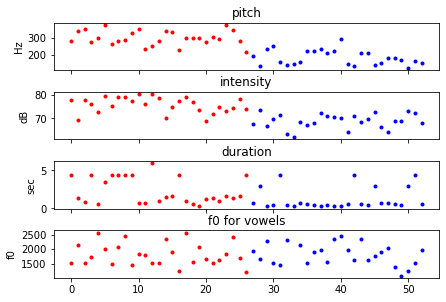

In [77]:
import matplotlib.pyplot as plt

# Create a separate nparray for each feature (pitch, intensity, duration, f0vowels
pitch = npdata[:,0:1]
intensity = npdata[:,1:2]
duration = npdata[:,2:3]
fzero = npdata[:,3:4]

# Create a plot with 7 subplots
fig, axs = plt.subplots(4, sharex=True)


for i in range(len(npdata)):
    if nptarget[i] == 0:
        axs[0].plot(i,pitch[i], color="red", marker=".")
        axs[1].plot(i,intensity[i], color="red", marker=".")
        axs[2].plot(i,duration[i], color="red", marker=".")
        axs[3].plot(i,fzero[i], color="red", marker=".")
    else:
        axs[0].plot(i,pitch[i], color="blue", marker=".")
        axs[1].plot(i,intensity[i], color="blue", marker=".")
        axs[2].plot(i,duration[i], color="blue", marker=".")
        axs[3].plot(i,fzero[i], color="blue", marker=".")

axs[0].set_title("pitch")
axs[1].set_title("intensity")
axs[2].set_title("duration")
axs[3].set_title("f0 for vowels")


axs[0].set_ylabel("Hz")
axs[1].set_ylabel("dB")
axs[2].set_ylabel("sec")
axs[3].set_ylabel("f0")


fig.tight_layout(pad=0.0)

plt.show()

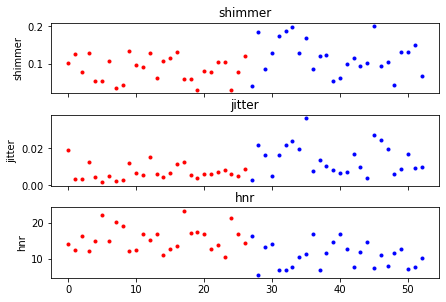

In [78]:
# Create a separate nparray for each feature (pitch, intensity, duration, f0vowels
shimmer = npdata[:,4:5]
jitter = npdata[:,5:6]
hnr = npdata[:,6:7]



# Create a plot with 3 subplots
fig, axs = plt.subplots(3, sharex=True)


for i in range(len(npdata)):
    if nptarget[i] == 0:
        axs[0].plot(i,jitter[i], color="red", marker=".")
        axs[1].plot(i,shimmer[i], color="red", marker=".")
        axs[2].plot(i,hnr[i], color="red", marker=".")
    else:
        axs[0].plot(i,jitter[i], color="blue", marker=".")
        axs[1].plot(i,shimmer[i], color="blue", marker=".")
        axs[2].plot(i,hnr[i], color="blue", marker=".")

axs[0].set_title("shimmer")
axs[1].set_title("jitter")
axs[2].set_title("hnr")



axs[0].set_ylabel("shimmer")
axs[1].set_ylabel("jitter")
axs[2].set_ylabel("hnr")


fig.tight_layout(pad=0.0)

plt.show()